
* Student name: Wambui Munene
* Student pace: DSPT08
* Scheduled project review date/time: 15/11/2024
* Instructor name: Samuel Karu



### Introduction

In this analysis, we will be analysing fuel consumption data and carbon dioxide emmisions data for new light-duty vehicles available for sale in Canada.We aim to understand, using data, the relationship between vehicle makes and models, engine size, number of cylinders, transmissiom type and the type of fuel on fuel economy and the resulting carbon footprint. We will use a dataset from https://www.kaggle.com/  based on original data from https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

### Problem Statement

Our Data Science Consulting Firm has been hired by Canadian start-up firm, that is venturing into the budget car rental business. Their mission is to provide a low-priced car rental model to cater for a demographic that is price and environmental conscious. They have tasked us to analyze different car makes, models and vehicle class to determine the most fuel effective models with the least carbon emmisions. Because car models are ever changing, they would want to understand the factors that drive those 2 variables and would like us to develop for them a predictive model that they can use to evaluate future car models that enter the market.

### Objectives

Our analysis will consist of 5 main tasks:-

1. **Industry Background:** This will include background understanding of the car industry and especially the relationships between , fuel consumption and carbon dioxide emissions to the make/model, type of fuel used, engine sizes, and transmission types. To do this we will perform background internet reserach from sites such as https://www.greenvehicleguide.gov.au/pages/UnderstandingEmissions/VehicleEmissions and https://climate.ec.europa.eu/news-your-voice/news/publication-real-world-co2-emissions-and-fuel-consumption-cars-and-vans-. https://iopscience.iop.org/article/10.1088/1755-1315/214/1/012136/pdf <p>  


2. **Understand the dataset:**  Understand the acronyms/technical terms used in the data set, review the shape and type of the data, understand the numerical and categorical columns, review the missing values and make a decision on how to deal with the Null values (drop or replace), look for duplicates and drop them, drop any unnecessary columns that are not useful for the analysis, add new colums if necessary for better analysis and prepare the data for EDA.<p>

3. **Business Objective:** Identify and recommend to our client from each vehicle class, (3-5) makes that give the best fuel efficiency and have the lowest CO2 emissions. <p> 
    a. Investigate how different car makes perform in terms of fuel efficiency and CO2 emmissions  
    b. Investigate how Engine Size affects fuel efficiency and CO2 emissions  
    c. Investigate how Transmission Type affects fuel efficiency  
    d. Investigate how Fuel Type affects CO2 emissions <p> 
       
    
4.  **Statistical Tests** <p> 
    4.1. **Trend Analysis**  
       a. Trend analysis to identify average fuel consumption for the top 3 makes in each vehicle class over time  
       b. Trend analysis to identify average emissions for the top 3 makes in each vehicle class over time<p>
    
     
    4.2. **Regression Analysis**  
       a. Effect of engine size on fuel efficiency  
       b. Effect of fuel consumption as measured by 'Comb (L/100 KM) and emissions  
       c. Effect of Transmission type on fuel efficiency  
       d. Effect of fuel type on emissions  <p>
    
          
    4.3. **Hypothesis Testing**   
       a. Test whether the relationships obtaing by our regression models above are statistically significant<p>  
       
       
5. **Summarize our findings and give conclusions**  
    5.1. Give recomendations to our client on the right mix of car makes to consider for their  business, that will give them the              best fuel economy and low CO2 emissions.  
    5.2. Provide them with a summary of the various factors (car attributes) that have statistically significant impact on fuel efficiency and            CO2 emissions.


### 1.0 Industry Background

 From the Data Card in the Kaggle dataset, we have obtained the following explanations about the abbreviations used:

**Model**

4WD/4X4 = Four-wheel drive;
AWD = All-wheel drive;
CNG = Compressed natural gas;
FFV = Flexible-fuel vehicle;
NGV = Natural gas vehicle

**Transmission**

A = Automatic; 
AM = Automated manual; 
AS = Automatic with select shift; 
AV = Continuously variable; 
M = Manual; 
3 - 10 = Number of gears

**Fuel Type**

X = Regular gasoline:
Z = Premium gasoline:
D = Diesel:
E = Ethanol (E85);
N = Natural Gas

**Fuel Consumption**:
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

The car industry standards for fuel efficiency are often measured in liters per 100 kilometers (L/100 km) combined rating. Here's a general classification of fuel efficiency categories:

**Low Fuel Efficiency**: Vehicles that consume more than 12 L/100 km.

**Medium Fuel Efficiency**: Vehicles that consume between 8 L/100 km and 12 L/100 km.

**High Fuel Efficiency** : Vehicles that consume less than 8 L/100 km.

**CO2 Emissions**:
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

**Low Emissions**: Typically, vehicles with emissions below 150 g CO₂/km are considered low-emission.

**Medium Emissions**: Vehicles with emissions above 150 g CO₂/km and below 250 g CO₂/km fall into the medium-emission category.

**High Emissions**: Vehicles with emissions above 250 g CO₂/km are considered high-emission.

These standards are designed to reduce greenhouse gas emissions and improve air quality, contributing to global efforts to combat climate change. Here are some targets for fuel emissions and fuel efficiency for the USA, Canada and the EU by 2030:

**USA**

**Emissions Reduction**: The USA aims to reduce greenhouse gas emissions by 50-52% below 2005 levels by 2030.
**Fuel Efficiency**: The USA has set ambitious fuel efficiency standards for vehicles, aiming to increase the average fuel economy to about 50 miles per gallon by 2025, with further improvements expected by 2030.

**Canada**

**Emissions Reduction**: Canada has committed to reducing greenhouse gas emissions by 40-45% below 2005 levels by 2030.
**Fuel Efficiency**: Canada is focusing on improving fuel efficiency through measures like carbon pricing, clean fuels, and promoting electric vehicles.

**EU**

**Emissions Reduction**: The EU aims to reduce greenhouse gas emissions by 55% below 1990 levels by 2030.
**Fuel Efficiency**: The EU has set an ambitious energy efficiency target of reducing final energy consumption by 11.7% compared to projections for 2030

### 2. 1  Understanding the Dataset

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()
%matplotlib inline

In [2]:
# Load the data as a dataframe and dsplay the first 5 rows

data = pd.read_csv('../Data/Fuel_Consumption_2000_2022.csv')
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# check the shape of the data
data.shape
print(f"This data set consists of {data.shape[0]} rows")
print(f"This data set consists of {data.shape[1]} columns")

This data set consists of 22556 rows
This data set consists of 13 columns


In [4]:
data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [5]:
# Get column attributes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


From the column attributes the data does not have any null values. Also the columns that we expect to be numerical are well formatted as int or float. Categorical columns are likewise well formatted as objects. 

In [6]:
# confirming there are no Null values

data.isnull().values.any()

False

In [7]:
# Get statistical summary of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


From these summary statistics, we can detect detect extreme values in the 100th percentile, for all variables. The values are all more than twice as large as the numbers we are seeing in the 75th percentile. This is indicative of a outliers in the data set. This is not peculiar in the car industry as we have vehicles that are manufuctured for high performance e.g. for sporting activities or luxury (niche market)  and their features are significantly different from what are found in cars that are for day to day regular use.

In [8]:
# Get statistical summary of the categorical columns
data.describe(include='O').T


,count,unique,top,freq
MAKE,22556,87,CHEVROLET,1725
MODEL,22556,4242,JETTA,89
VEHICLE CLASS,22556,32,SUV,2640
TRANSMISSION,22556,30,A4,3519
FUEL,22556,5,X,11822


We observe that most popular make is Chevrolet and Jetta is the most prevalent model. The SUV is the most popular class of vehicle and most transmissions are 4 gear automatic. Regular gasoline cars are the most common.

## 2.2 Data Cleaning and Feature Engineering

Now that we have understood the basic data structure and the data types, we can go ahead and clean the data set before we can perform Explorative Data Analysis. In this section, we will clean up column names and also certain values in the data, drop any irrelevant columns, check for duplicates and outliers and drop duplicates and any extreme values that may distort our statistical analysis.

In [9]:
# Making a copy of the DataFrame before we clean
data1 = data.copy(deep=True)
data1.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [10]:
# check for duplicates
data1[data1.duplicated()]

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,17.7,12.7,15.4,18,354


In [11]:
# drop the duplicate row
data1.drop_duplicates(inplace=True)

In [12]:
# confirm the row is dropped
#data.shape
print(f"This data set consists of {data1.shape[0]} rows")
print(f"This data set consists of {data1.shape[1]} columns")

This data set consists of 22555 rows
This data set consists of 13 columns


We now have one less row on the dataset

In [13]:
# Change column names to sentence case for better readability

data1.columns = data.columns.str.title()
data1.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [14]:
# View unique values in 'Make', 'Vehicle Class' and Transmission to check for duplicated entries due to spellings 
# or case sensitivity

columns_to_check = ['Make','Vehicle Class','Transmission']

# check for unique values in the specified column
unique_values = data1[columns_to_check].apply(lambda x: x.unique())

#Display the unique values for each specified column
for column in unique_values.index:
    print(f"Unique values in '{column}':{unique_values[column]}")

Unique values in 'Make':['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
Unique values in 'Vehicle Class':['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-

We have duplicated names in the Make and Vehicle columns. Upper Case names are duplicates of the sentence case names. The transmission column consists of 2 elements: Transmission type and the number of gears. For enhanced analysis, we will split these into two new columns.

In [15]:
# Convert the 'Make ' column to Sentence case

data1['Make'] = data1['Make'].str.title()

# Check unique values again
data1['Make'].unique()

array(['Acura', 'Audi', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Daewoo', 'Dodge', 'Ferrari', 'Ford', 'Gmc', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land Rover', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
       'Bentley', 'Rolls-Royce', 'Maserati', 'Mini', 'Mitsubishi',
       'Smart', 'Hummer', 'Aston Martin', 'Lamborghini', 'Bugatti',
       'Scion', 'Fiat', 'Ram', 'Srt', 'Alfa Romeo', 'Genesis'],
      dtype=object)

In [16]:
# Define the mapping to replace the Upper Case duplicates for the Vehicle Class column. 
# We will use mapping because the duplicate value have both case sensitivity and "-" and ":" separation issues

replace_dict = { 'COMPACT': 'Compact', 'MID-SIZE': 'Mid-size', 'SUBCOMPACT': 'Subcompact', 
                'STATION WAGON - MID-SIZE': 'Station wagon: Mid-size','MINICOMPACT': 'Minicompact',
                'TWO-SEATER': 'Two-seater','STATION WAGON - SMALL': 'Station wagon: Small',
                'FULL-SIZE': 'Full-size', 'SUV': 'SUV: Standard','VAN - CARGO':'Van:Cargo',
                'VAN - PASSENGER':'Van: Passenger','PICKUP TRUCK - STANDARD':'Pickup truck: Standard',
                'PICKUP TRUCK - SMALL':'Pickup truck: Small','MINIVAN': 'Minivan','SUV - STANDARD': 'SUV: Standard',
                'SPECIAL PURPOSE VEHICLE': 'Special purpose vehicle','SUV - SMALL': 'SUV: Small'}

# Replace the upper case duplicates 
data1['Vehicle Class'] = data1['Vehicle Class'].replace(replace_dict)
data1['Vehicle Class'].unique()
               

array(['Compact', 'Mid-size', 'Subcompact', 'Station wagon: Mid-size',
       'Minicompact', 'Two-seater', 'Station wagon: Small', 'Full-size',
       'SUV: Standard', 'Van:Cargo', 'Van: Passenger',
       'Pickup truck: Standard', 'Pickup truck: Small', 'Minivan',
       'Special purpose vehicle', 'SUV: Small'], dtype=object)

In [17]:
# Create 2 new columns for 'Transmission Type' and 'Gears' from the transmission column

data1['Transmission Type'] = data1['Transmission'].str.extract(r'([A-Za-z]+)') 
data1['Gears'] = data1['Transmission'].str.extract(r'(\d+)') 
# Convert Gears column to numeric type 
data1['Gears'] = pd.to_numeric(data1['Gears'], errors='coerce') 
# Display the updated DataFrame 
data1.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0


In [18]:
# Classify emissions column into low, medium and high based on industry standards:

# Define a function to classify emissions 

def classify_emissions(x): 
    if x <= 150: 
        return 'Low' 
    elif 100 < x <= 250: 
        return 'Medium' 
    else: 
        return 'High'
    
#Apply the classification function to the emissions column

data1['Emissions Class'] = data1['Emissions'].apply(classify_emissions)
data1.head(5)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears,Emissions Class
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0,Medium
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0,Medium
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0,Medium
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0,High
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0,Medium


In [19]:
# Classify Fuel Consumption into low, medium and high efficiency based on general industry standards. We will use the 
# 'Comb (L/100 Km)' column which is the average experince of a regular car rental customer

#Define a function to classify fuel efficiency 

def fuel_efficiency(y): 
    if y > 12: 
        return 'Low Efficiency' 
    elif 8 <= y <= 12: 
        return 'Medium Efficiency' 
    else: 
        return 'High Efficiency'
    
#Apply the classification function to the emissions column

data1['Fuel Efficiency'] = data1['Comb (L/100 Km)'].apply(fuel_efficiency)
data1.head(5)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0,Medium,Medium Efficiency


In [20]:
# Numerical columns statistics
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,22555.0,2011.554955,6.297939,2000.0,2006.0,2012.0,2017.0,2022.0
Engine Size,22555.0,3.356617,1.335448,0.8,2.3,3.0,4.2,8.4
Cylinders,22555.0,5.854046,1.819582,2.0,4.0,6.0,8.0,16.0
Fuel Consumption,22555.0,12.763294,3.500922,3.5,10.4,12.3,14.7,30.6
Hwy (L/100 Km),22555.0,8.918958,2.274675,3.2,7.3,8.4,10.2,20.9
Comb (L/100 Km),22555.0,11.034148,2.910839,3.6,9.1,10.6,12.7,26.1
Comb (Mpg),22555.0,27.374950,7.376881,11.0,22.0,27.0,31.0,78.0
Emissions,22555.0,250.063844,59.352558,83.0,209.0,243.0,288.0,608.0
Gears,21739.0,5.971342,1.469272,1.0,5.0,6.0,7.0,10.0


The max column shows that we have significant outliers in most columns which is expected in the industry due to specific luxury and sports performance niches. These outliers adversely affect fuel efficiency and emissions and we should remove them for better analysis of the data.

In [21]:
# Categorical Columns Analysis
data1.describe(include='O').T


,count,unique,top,freq
Make,22555,52,Chevrolet,2130
Model,22555,4242,JETTA,89
Vehicle Class,22555,16,SUV: Standard,3761
Transmission,22555,30,A4,3518
Fuel,22555,5,X,11822
Transmission Type,22555,5,A,8690
Emissions Class,22555,3,Medium,11742
Fuel Efficiency,22555,3,Medium Efficiency,12999


It is interesting to note that most vehicles are in the medium emissions class range and the medium fuel efficiency range. This is expected because technologies for high fuel efficiency that lead to low emissions are still not fully adopted. However major countries in the world have set targets to continously improve on the 2 variables systematically.

In [22]:
# Drop the 'Comb (Mpg)'(imperial standard used mostly in the US) column ; all other relevant are using the metric system
# Also drop the 'Transmission' column as it has been split into 2 new columns: 'Transmission Type' and 'Gears'
data2 = data1.drop(columns=['Comb (Mpg)','Transmission'])
data2

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,Z,13.4,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Z,10.7,7.7,9.4,219,AS,8.0,Medium,Medium Efficiency
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Z,10.5,8.1,9.4,219,AS,8.0,Medium,Medium Efficiency
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Z,11.0,8.7,9.9,232,AS,8.0,Medium,Medium Efficiency
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Z,11.5,8.4,10.1,236,AS,8.0,Medium,Medium Efficiency


In [23]:
# Remove for outliers in various columns using IQR method

def remove_outliers(df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column]<=upper_bound)]
    return df

# columns to check for outliers
check_outliers = ['Engine Size','Cylinders','Fuel Consumption','Hwy (L/100 Km)',
                    'Comb (L/100 Km)','Emissions','Gears']
# Remove outliers
data3 = remove_outliers(data2,check_outliers)

# display the cleaned DataFrame
data3.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,Z,13.4,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency


In [24]:
# check the shape of the data
data3.shape
print(f"This data set consists of {data3.shape[0]} rows")
print(f"This data set consists of {data3.shape[1]} columns")

This data set consists of 20864 rows
This data set consists of 15 columns


Removing outliers has reduced the records from 22555 rows to 20864 rows

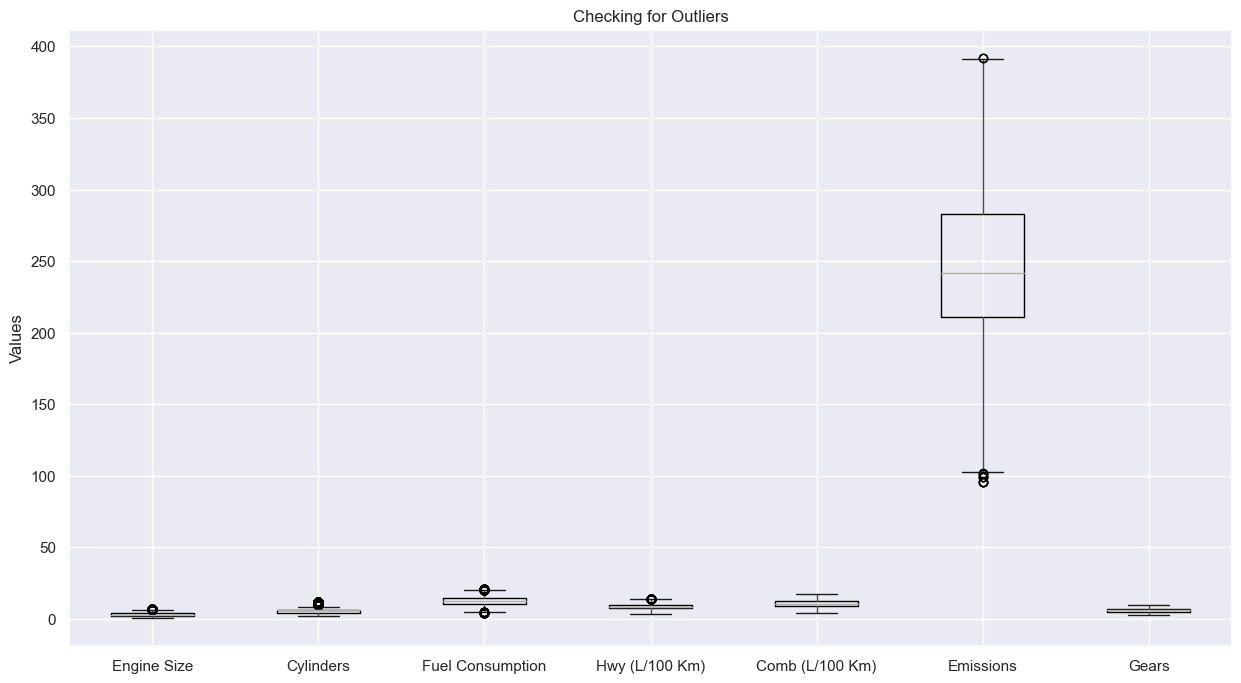

In [25]:
# Generate boxplots for cleaned columns to confirm outliers have been dropped
plt.figure(figsize=(15,8))
data3.boxplot(column=['Engine Size','Cylinders','Fuel Consumption','Hwy (L/100 Km)',
                    'Comb (L/100 Km)','Emissions','Gears'], boxprops=dict(linewidth=1 ))
plt.title('Checking for Outliers')
plt.ylabel('Values')

                          
plt.show();

The outliers are now eliminated and we can go ahead and start EDA. But first we save the clean dataframe to a CSV and make a copy of the same

In [26]:
# save the clean dataframe in csv format
data3.to_csv('FuelEfficiency_Clean.csv',index=False)

In [27]:
# create a copy of the clean dataframe
data3=data3.copy(deep=True)

## 3. Exploratory Data Analysis (EDA)

We will perform univariate, bivariate and multivariate data analysis using summary statistics and visualizations to determine the most fuel efficient vehicles in each vehicle class that also have the low carbon emissions. Since we are looking for a fleet that cuts across different vehicle classes to appeal to a wide range of customers, our analysis will determine the following:-

1. The best 3 makes based on the fuel efficieny and low emissions criteria for each vehicle class - as a customer centric business we need to give our customers choice.
2. Using simple regression analysis, investigate the relationship between various vehicle attributes such as fuel type, engine size, gears, cylinders, transmission type with fuel efficiency and low emmissions.
3. Using Hypothesis testing, we will test these relationships for statistical significance.


In [28]:
# Load the clean dataset and create a new dataframe
df_clean = pd.read_csv('FuelEfficiency_Clean.csv')
df_clean

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,Z,13.4,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20859,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Z,10.7,7.7,9.4,219,AS,8.0,Medium,Medium Efficiency
20860,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Z,10.5,8.1,9.4,219,AS,8.0,Medium,Medium Efficiency
20861,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Z,11.0,8.7,9.9,232,AS,8.0,Medium,Medium Efficiency
20862,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Z,11.5,8.4,10.1,236,AS,8.0,Medium,Medium Efficiency


In [29]:
df_clean.isna().sum().any()

False

In [30]:
df_clean.columns


Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)',
       'Emissions', 'Transmission Type', 'Gears', 'Emissions Class',
       'Fuel Efficiency'],
      dtype='object')

In [31]:
# Rename variables in the 'Fuel' column
df_clean['Fuel'] = df_clean['Fuel'].replace({
    'X': 'Regular',
    'Z': 'Premium',
    'E': 'Ethanol',
    'N': 'Natural Gas',
    'D': 'Diesel'
})

# Display the updated DataFrame
df_clean.head(1)


,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,Regular,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency


In [32]:
df_clean['Transmission Type'].value_counts()

Transmission Type
A     8091
AS    6592
M     4768
AM    1030
AV     383
Name: count, dtype: int64

In [33]:
# Rename variables in the 'Transmission Type' column
df_clean['Transmission Type'] = df_clean['Transmission Type'].replace({
    'A':'Auto',
    'AS':'Auto Shift',
    'M':'Manual',
    'AM':'Auto Manual',
    'AV':'Auto Variable'
})

# Display the updated DataFrame
df_clean.head(1)


,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,Regular,9.2,6.7,8.1,186,Auto,4.0,Medium,Medium Efficiency


In [34]:
# Rename the column
df_clean.rename(columns={'Transmission Type': 'Transmission'}, inplace=True)
df_clean.head(1)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,Regular,9.2,6.7,8.1,186,Auto,4.0,Medium,Medium Efficiency


In [35]:
df_clean.rename(columns={'Comb (L/100 Km)': 'Comb_L_per_100Km'}, inplace=True)

### 3.1 Univariate Analysis

The following analysis will help us understand the statistical characteristics, the distribution and frequencies of individual columns in our data set 

In [36]:
# Get Descriptive statistical summary of the numerical columns
# Define custom aggregation functions
specific_cols = ['Engine Size','Cylinders','Emissions','Gears','Hwy (L/100 Km)','Comb_L_per_100Km']
descriptive_stats = df_clean[specific_cols].agg(['mean','std','median','min','max']).T
Mode = df_clean[specific_cols].mode().iloc[0]

print(descriptive_stats)

print(Mode)


                        mean        std  median   min    max
Engine Size         3.303561   1.265645     3.0   0.8    7.0
Cylinders           5.793472   1.726453     6.0   2.0   12.0
Emissions         248.556173  53.426101   242.0  96.0  392.0
Gears               5.990127   1.464825     6.0   3.0   10.0
Hwy (L/100 Km)      8.756351   1.915990     8.4   3.8   14.2
Comb_L_per_100Km   10.851721   2.421089    10.5   4.1   17.5
Engine Size           2.0
Cylinders             6.0
Emissions           221.0
Gears                 6.0
Hwy (L/100 Km)        7.8
Comb_L_per_100Km      9.8
Name: 0, dtype: float64


The data shows a high variance on emissions and a moderate variance on consumption

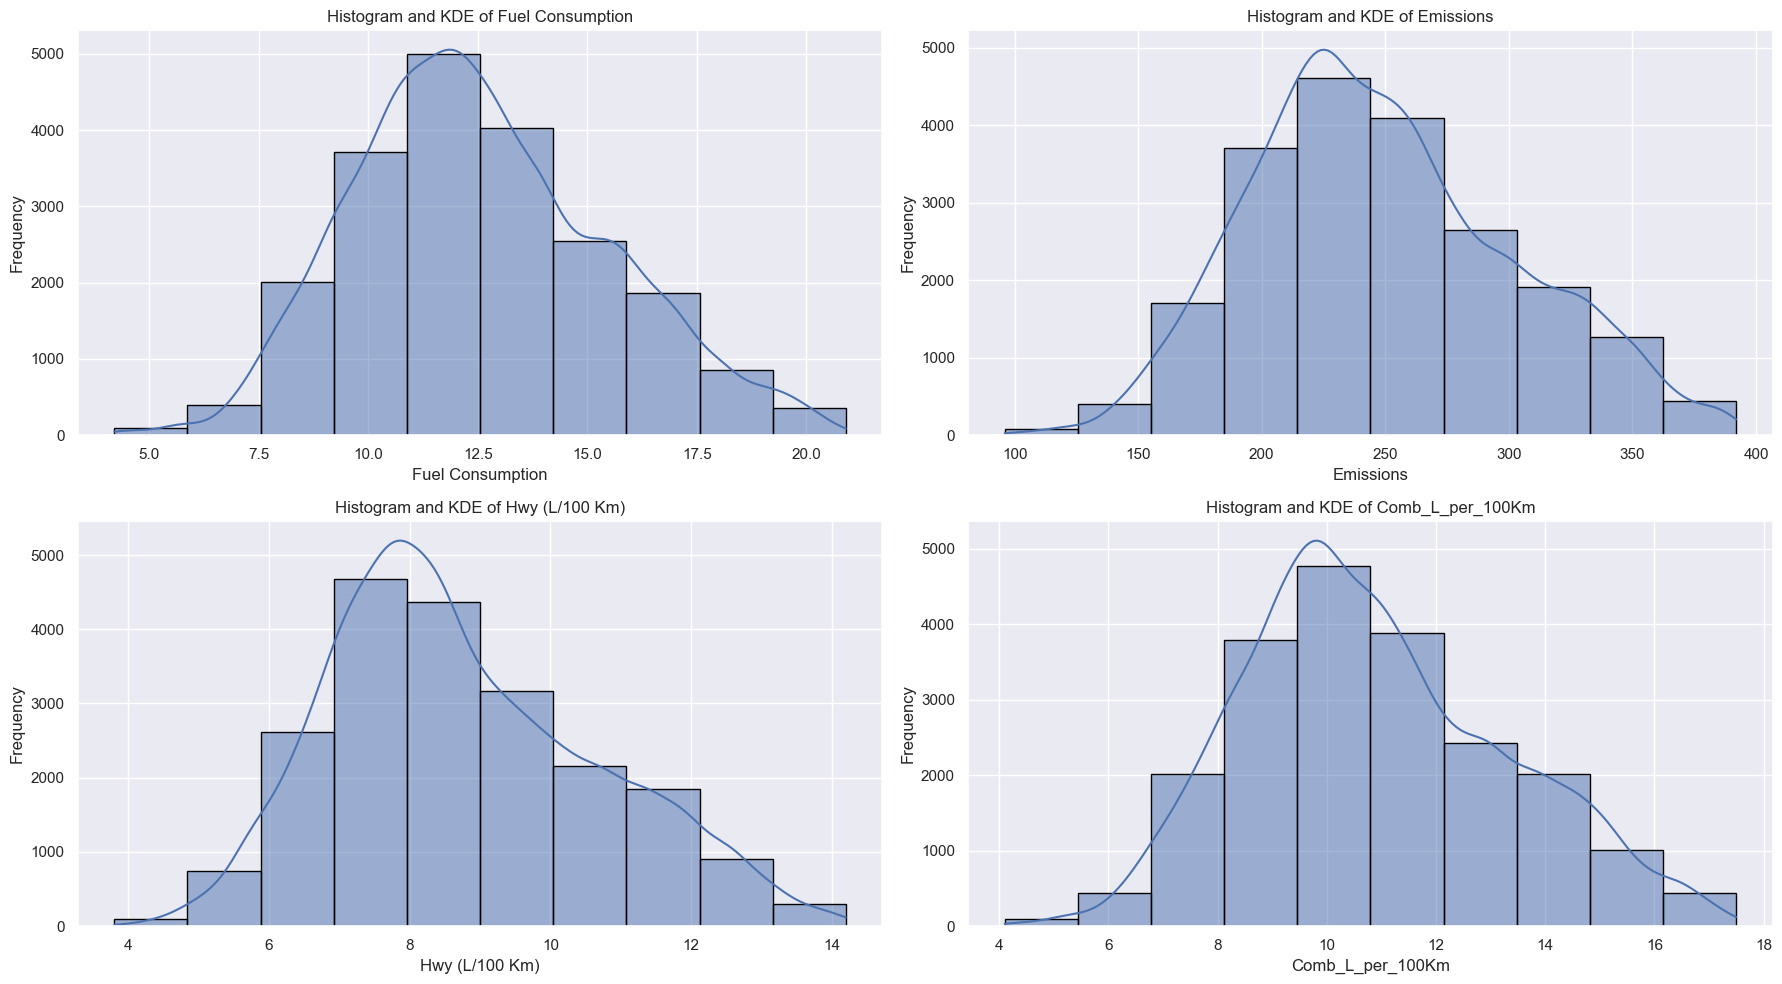

In [37]:

# Plot histograms for continonous numeriical coloumns
list_cols = ['Fuel Consumption','Emissions', 'Hwy (L/100 Km)', 'Comb_L_per_100Km']

# Create sub-plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10)) 
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(list_cols): 
    sns.histplot(df_clean[column], bins=10,kde=True,ax=axes[i],edgecolor='black') 
    axes[i].set_title(f'Histogram and KDE of {column}') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The didtribution of fuel consumption and emissions tend towards normality with a slight right skwenness.


In [38]:
# Get statistical summary of the categorical columns
df_clean.describe(include='O').T

,count,unique,top,freq
Make,20864,50,Chevrolet,1892
Model,20864,4015,JETTA,89
Vehicle Class,20864,16,SUV: Standard,3384
Fuel,20864,5,Regular,10985
Transmission,20864,5,Auto,8091
Emissions Class,20864,3,Medium,11132
Fuel Efficiency,20864,3,Medium Efficiency,12645


The Vehicle class with the highest frequency after removing outliers is now the Compact and not the SUV Standard. All the other variables remain unchanged.

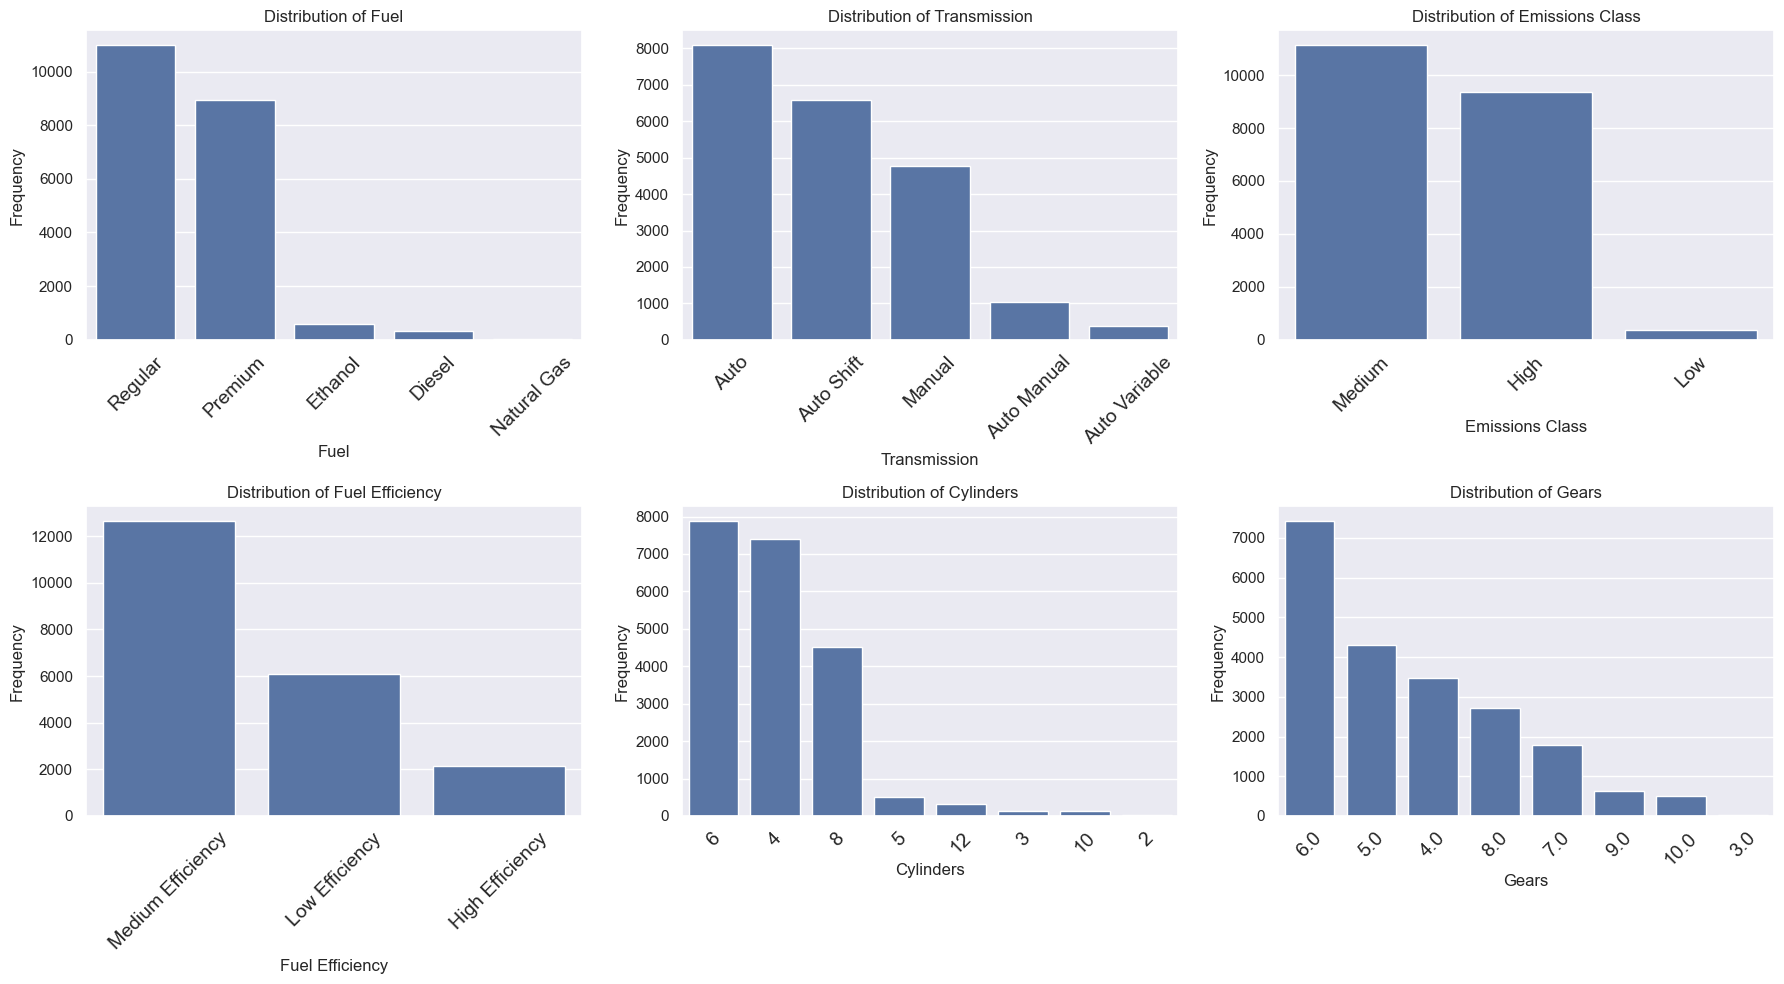

In [39]:
# plot frequency distributions for categorical columns
def plot_frequency_dist(df_clean, columns,rows,cols): 
    fig,axes = plt.subplots(rows,cols,figsize=(18,10))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=df_clean, order=df_clean[column].value_counts().index, ax=axes[i]) 
        axes[i].set_title(f"Distribution of {column}") 
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45,labelsize=14)
        
    plt.tight_layout()
    plt.show() 
        
        
# List of columns 
columns_list = ['Fuel','Transmission', 'Emissions Class','Fuel Efficiency',
                'Cylinders','Gears'] 

rows = 2
cols = 3
# Plot frequency distributions for categorical columns 
plot_frequency_dist(df_clean, columns_list,rows,cols)

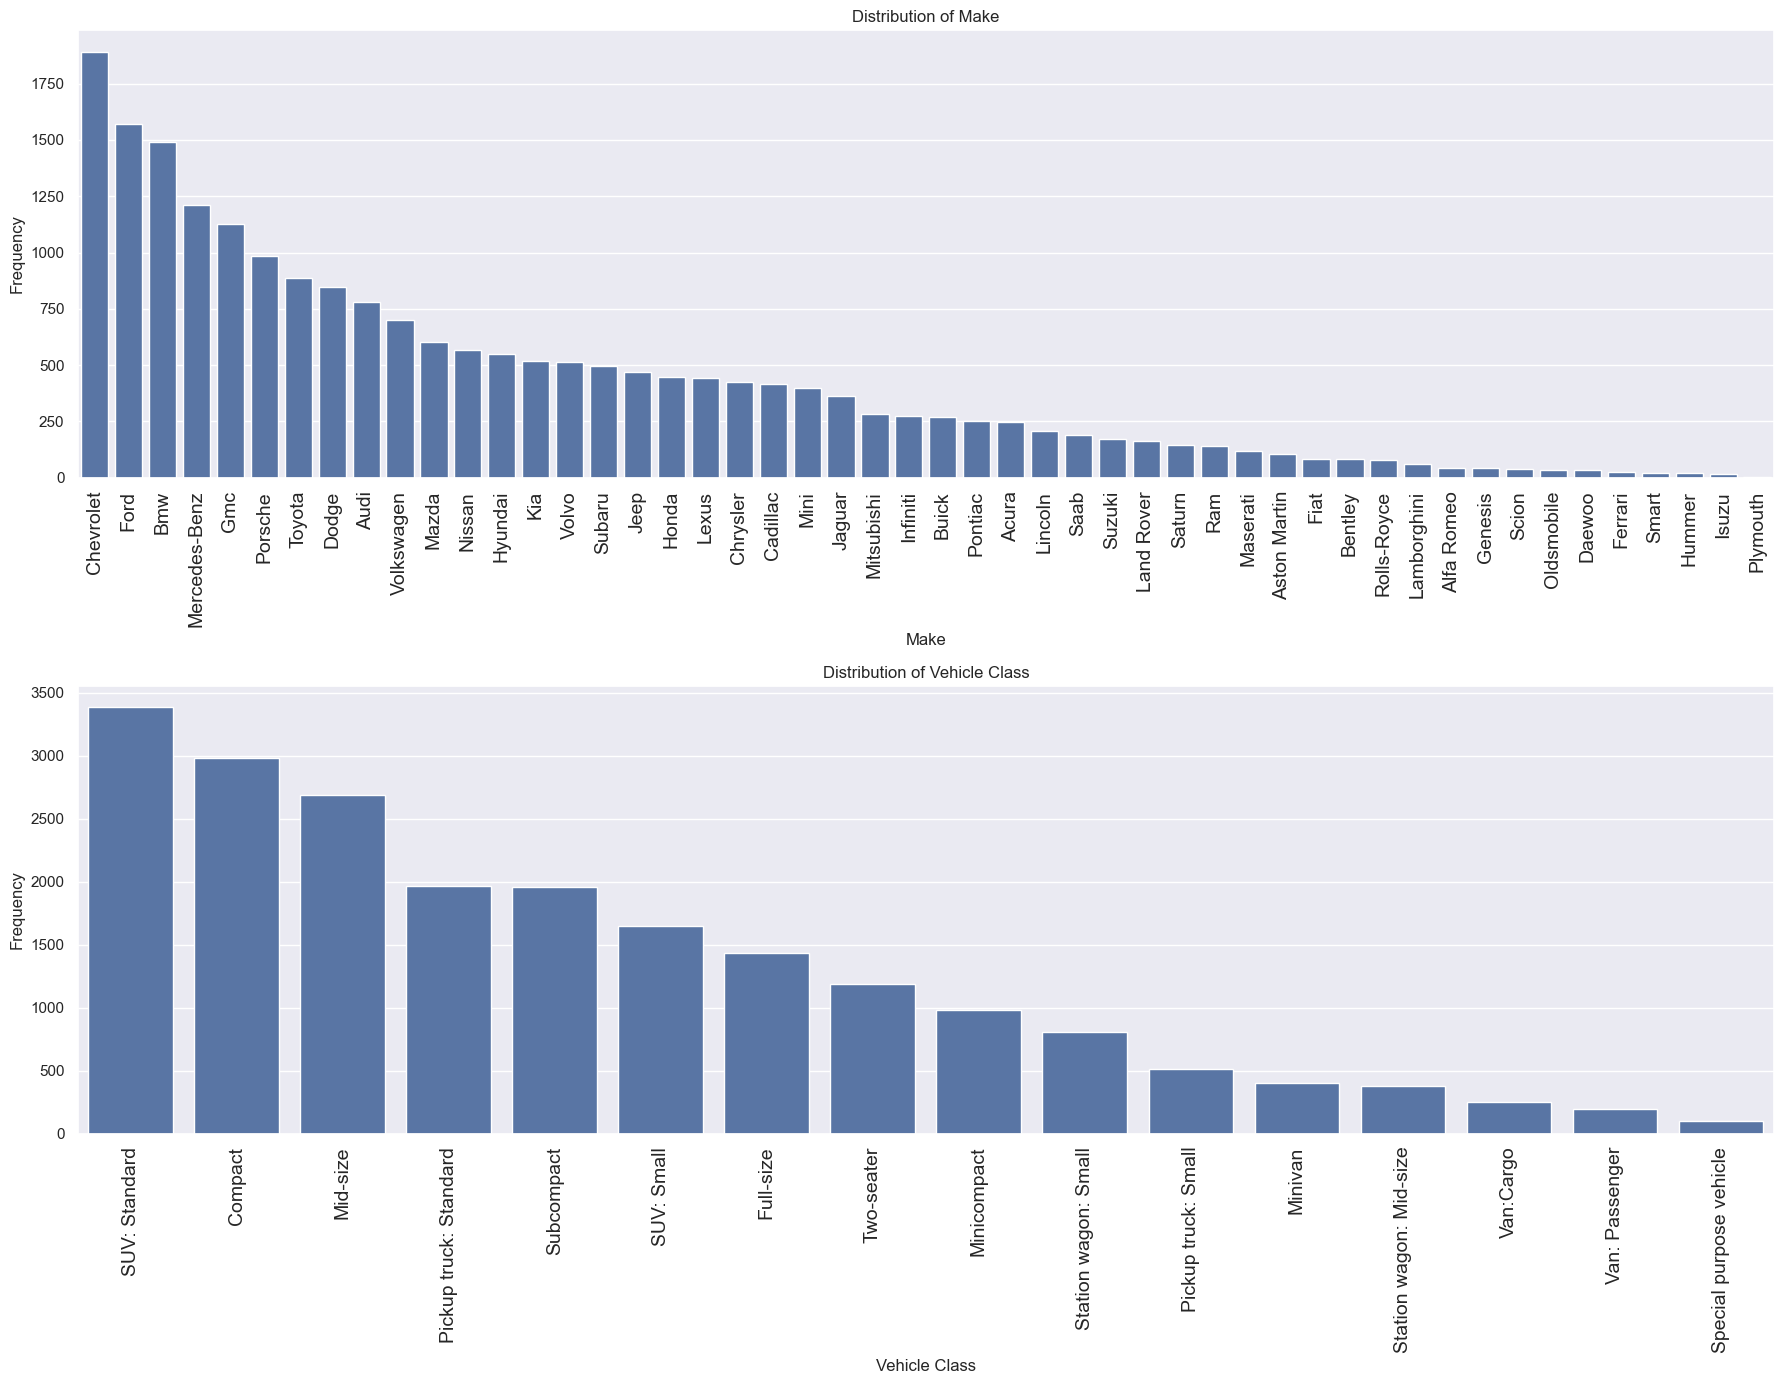

In [40]:
# plot frequency distributions for columns
def plot_frequency_dist(df_clean, columns,rows,cols): 
    fig,axes = plt.subplots(rows,cols,figsize=(18,14))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=df_clean, order=df_clean[column].value_counts().index, ax=axes[i]) 
        axes[i].set_title(f"Distribution of {column}") 
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=90,labelsize=14)
        
    plt.tight_layout()
    plt.show() 
        
        
# List of columns 
columns_list = ['Make','Vehicle Class'] 

rows = 2
cols = 1
# Plot frequency distributions for categorical columns 
plot_frequency_dist(df_clean, columns_list,rows,cols)

### 3.2 Bivariate Analysis
In this section, we will examine the relationships between our two variables of interest (emissions and fuel efficiency) with other variables like make,vehicle class,fuel, gears,transmission type etc. This will help us determine the characteristics that contribute to better fuel efficiency and low emissions and help us narrow down to our proposed fleet composition. We will use bar plots to visualize the relationship between two categorical variables, Box Plots to compare distributions of a numerical variable across different categories, scatter plots to investigate the relationship between two numerical variables (and also help us determinal linearity) for our predictive model, correlation analysis (including heat maps) to quatify the strength and direction of the relationship between two numeric variables.

#### 3.2.1 Investigate how different Vehicle Makes perform in terms of fuel efficiency and CO2 emissions

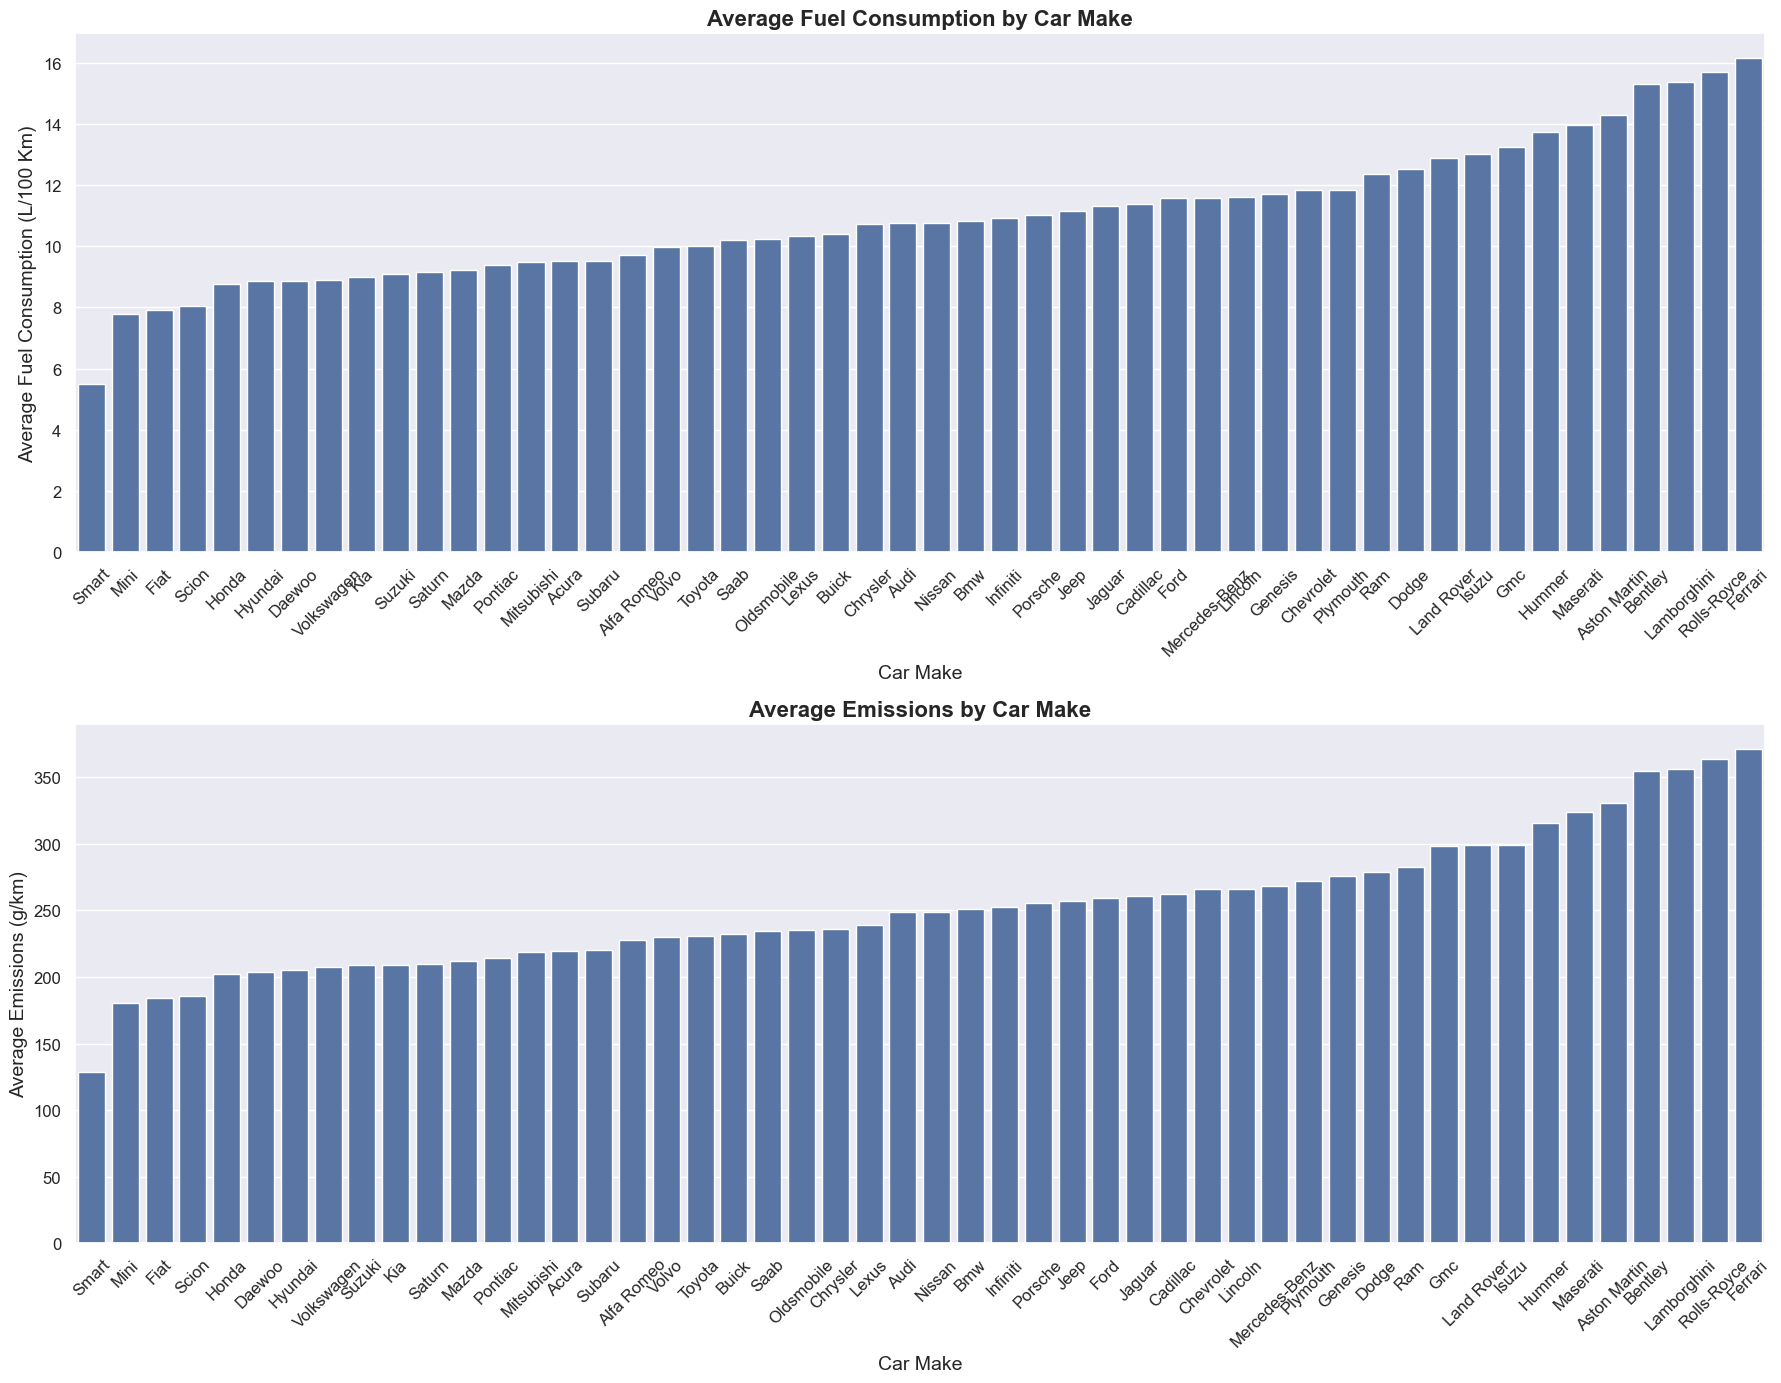

In [41]:

# sort the data
mean_fuel = df_clean.groupby('Make')['Comb_L_per_100Km'].mean().sort_values()
mean_emissions = df_clean.groupby('Make')['Emissions'].mean().sort_values()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))

# Plot for Average Fuel Consumption
sns.barplot(x=mean_fuel.index, y=mean_fuel.values,ax=axes[0])
axes[0].set_title('Average Fuel Consumption by Car Make', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Car Make', fontsize=14)
axes[0].set_ylabel('Average Fuel Consumption (L/100 Km)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot for Average Emissions
sns.barplot(x=mean_emissions.index, y=mean_emissions.values,ax=axes[1])
axes[1].set_title('Average Emissions by Car Make', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Car Make', fontsize=14)
axes[1].set_ylabel('Average Emissions (g/km)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


From the charts above, we can see that average fuel consumption has a direct relationship to emissions. Vehicles with the lowest fuel consumption also have the lowest emissions.

#### 3.2.2 Investigate how different Vehicle Classes perform in terms of fuel efficiency and CO2 emissions

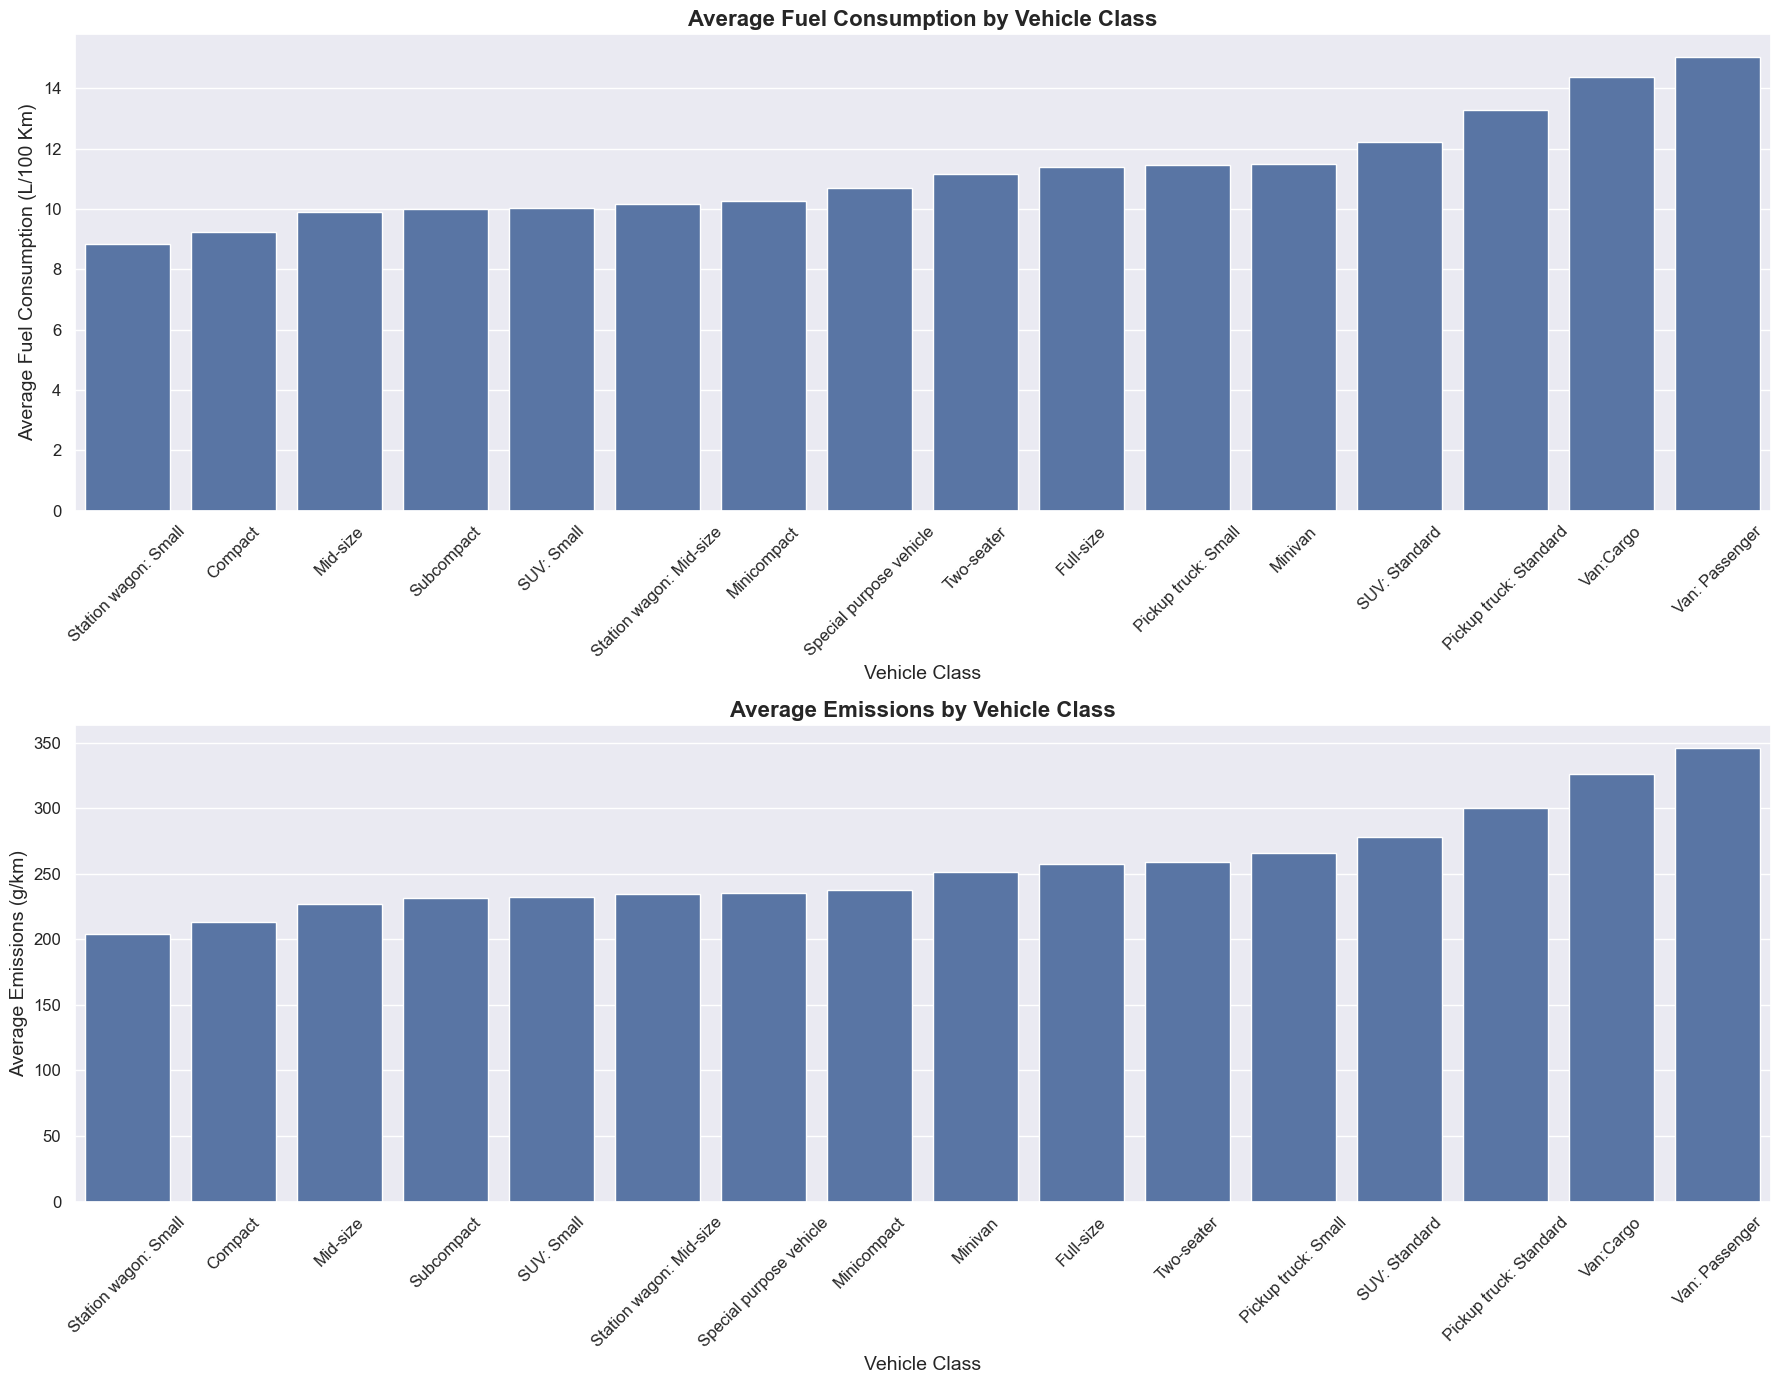

In [42]:
# sort the data
mean_fuel = df_clean.groupby('Vehicle Class')['Comb_L_per_100Km'].mean().sort_values()
mean_emissions = df_clean.groupby('Vehicle Class')['Emissions'].mean().sort_values()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))

# Plot for Average Fuel Consumption
sns.barplot(x=mean_fuel.index, y=mean_fuel.values,ax=axes[0])
axes[0].set_title('Average Fuel Consumption by Vehicle Class', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Vehicle Class', fontsize=14)
axes[0].set_ylabel('Average Fuel Consumption (L/100 Km)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot for Average Emissions
sns.barplot(x=mean_emissions.index, y=mean_emissions.values,ax=axes[1])
axes[1].set_title('Average Emissions by Vehicle Class', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Vehicle Class', fontsize=14)
axes[1].set_ylabel('Average Emissions (g/km)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The charts are almost a mirror image of one another, showing there is a very high correlationship between fuel consumption and emissions.

#### 3.2.3 Average Emissions by Fuel Type

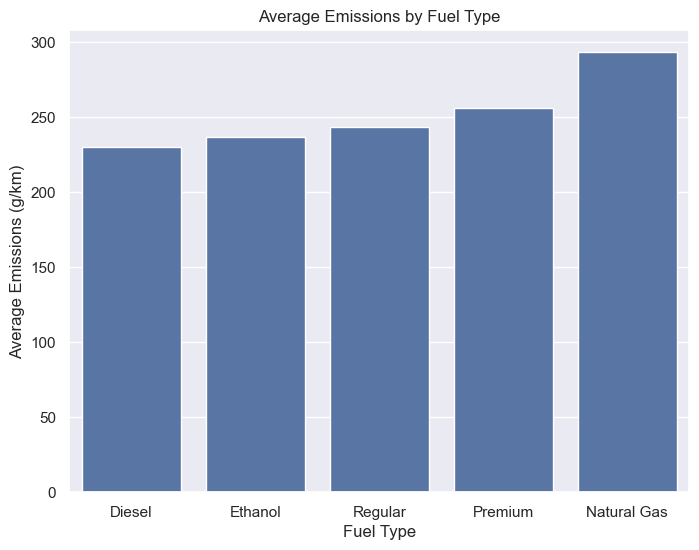

In [43]:

# Calculate the average emissions by fuel type
average_emissions = df_clean.groupby('Fuel')['Emissions'].mean().reset_index().sort_values(by='Emissions')

# Create a bar plot to visualize the average emissions by fuel type
plt.figure(figsize=(8, 6))
sns.barplot(x='Fuel', y='Emissions', data=average_emissions)
plt.title('Average Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Emissions (g/km)')
plt.show()


The chart shows that Diesel has the lowest average emissions with Natural Gas having the highest

#### 3.2.4 Average Consumption by Transmission Type

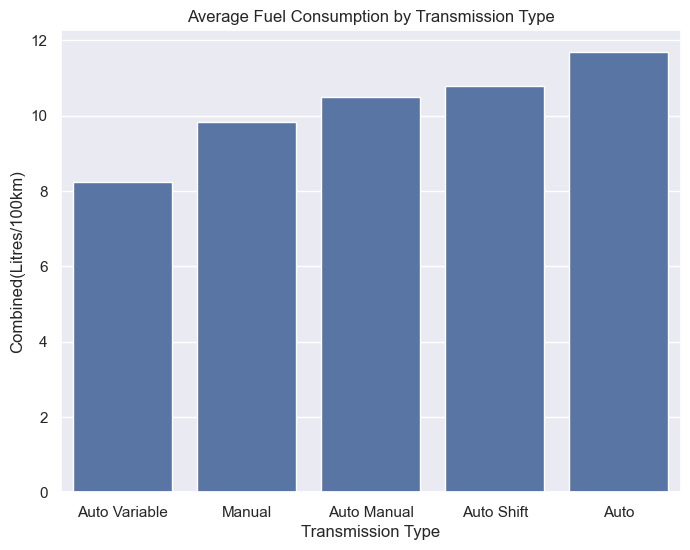

In [44]:
# Calculate the average fuel consumption by transmision type
average_fuel = df_clean.groupby('Transmission')['Comb_L_per_100Km'].mean().reset_index().sort_values(by='Comb_L_per_100Km')

# Create a bar plot to visualize the average emissions by fuel type
plt.figure(figsize=(8, 6))
sns.barplot(x='Transmission', y='Comb_L_per_100Km', data=average_fuel)
plt.title('Average Fuel Consumption by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Combined(Litres/100km)')
plt.show()


#### 3.2.5 Trend Analysis on average fuel consumption and emission between 2000 and 2022


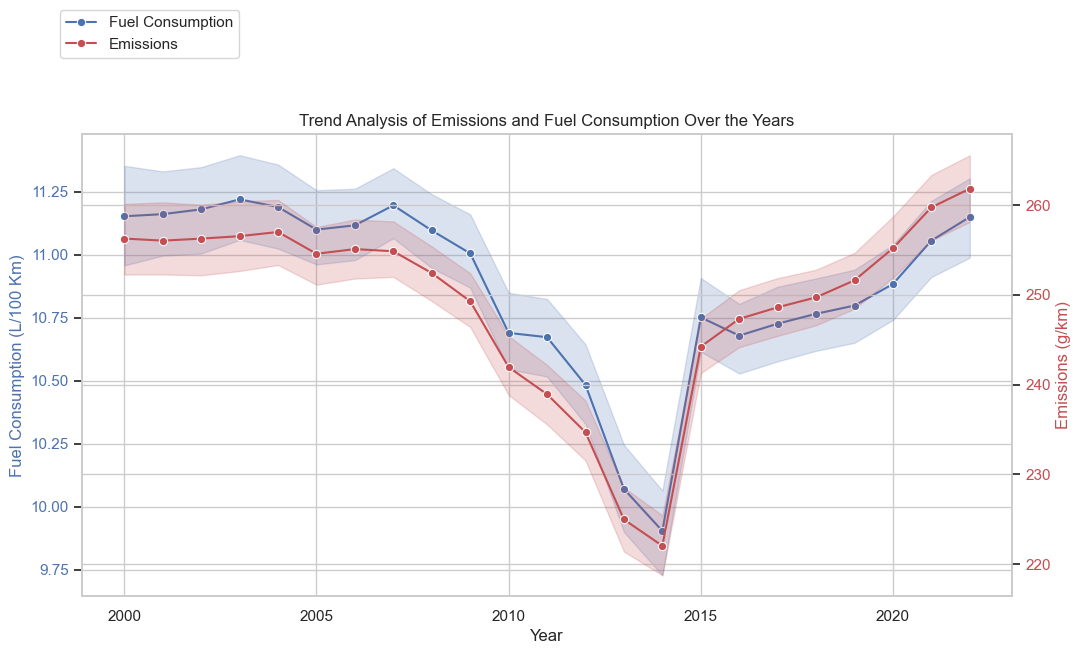

In [45]:


# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fuel Consumption on the left y-axis
sns.lineplot(x='Year', y='Comb_L_per_100Km', data=df_clean, ax=ax1, marker='o', label='Fuel Consumption', color='b')
ax1.set_ylabel('Fuel Consumption (L/100 Km)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot Emissions
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Emissions', data=df_clean, ax=ax2, marker='o', label='Emissions', color='r')
ax2.set_ylabel('Emissions (g/km)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set plot title
plt.title('Trend Analysis of Emissions and Fuel Consumption Over the Years')

# Disable individual legends
ax1.get_legend().remove()
ax2.get_legend().remove()

# Place a combined legend outside the plot
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# Display the plot
plt.show()



**Fuel Consumption:** Represented by a blue line, shows a general decrease from 2000 to around 2013, then a sharp increase from 2013 to 2015, and a steady rise until 2020.

**Emissions:** Represented by a red line, follows a similar trend to fuel consumption with a decrease until around 2013, then a sharp increase from 2013 to 2015, and continued steady rise until 2020.


The decreasing trend in both fuel consumption and emissions until 2013 could be due to improvements in vehicle efficiency and stricter emission standards.

The increase from 2013 onwards might reflect changes in vehicle types, driving habits, or regulatory changes that impacted fuel consumption and emissions.    






## 4.0 Objectives

### 4.1  Identify from each Vehicle Class 3 Makes that give the best fuel efficiency and have the lowest CO2 emissions.
From the charts above, we have seen that fuel efficiency and CO2 Emissions have a very high correlation. It is therefore safe to assume that the vehicles chosen for each class have the lowest CO2 emissions

In [46]:
# Group by Vehicle Class and Make, then calculate the average fuel consumption
grouped = df_clean.groupby(['Vehicle Class', 'Make'])['Comb_L_per_100Km'].mean().reset_index()

# Sort and select the top 5 makes with the lowest fuel consumption for each vehicle class
top_makes = grouped.groupby('Vehicle Class').apply(lambda x: x.nsmallest(3, 'Comb_L_per_100Km')).reset_index(drop=True)

# Display the result

top_makes

,Vehicle Class,Make,Comb_L_per_100Km
0,Compact,Toyota,7.408000
1,Compact,Saturn,7.566667
2,Compact,Honda,7.594667
3,Full-size,Honda,7.967925
4,Full-size,Subaru,8.283333
5,Full-size,Hyundai,8.531959
6,Mid-size,Scion,7.550000
7,Mid-size,Hyundai,7.720213
8,Mid-size,Kia,7.966346
9,Minicompact,Fiat,7.430769


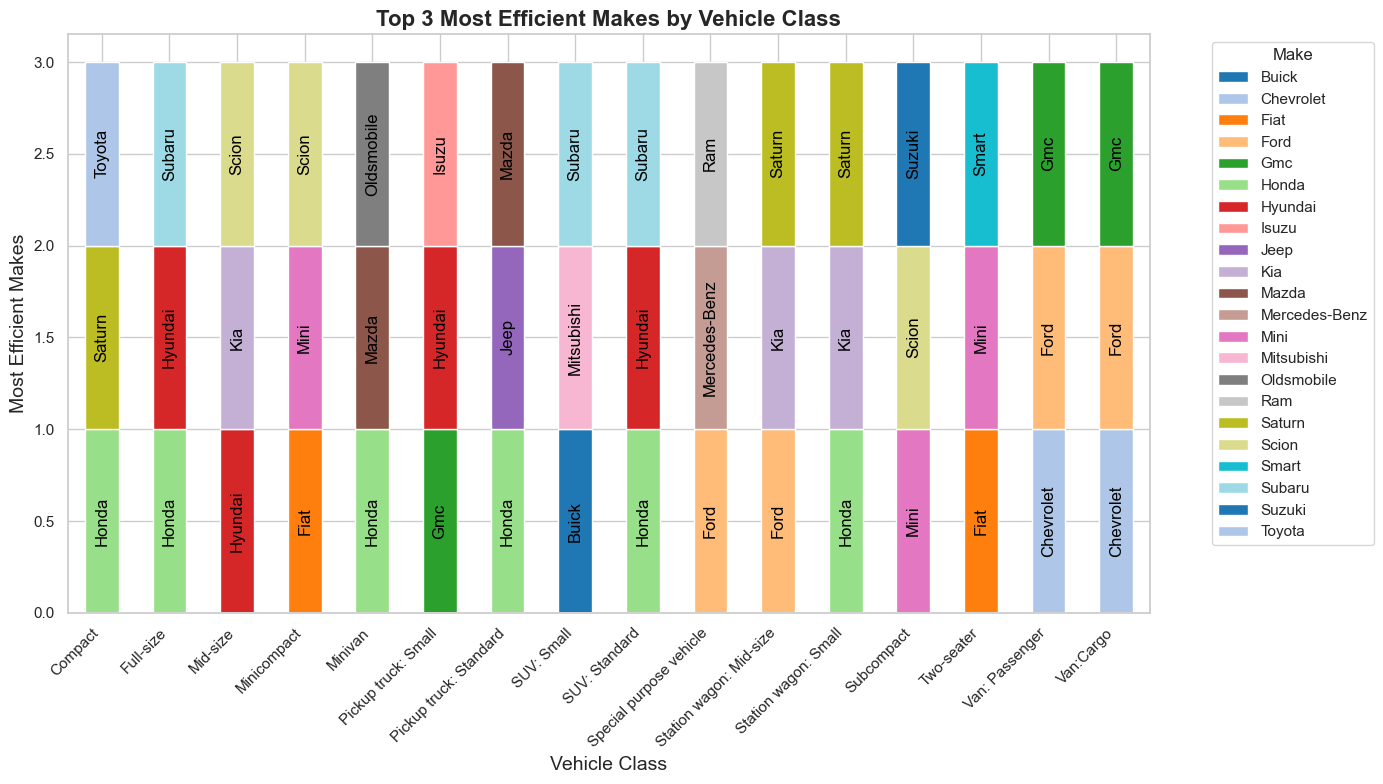

In [79]:

# Aggregate data by vehicle class and make
vehicle_make_counts = top_makes.groupby(['Vehicle Class', 'Make']).size().unstack().fillna(0)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stacked bar chart
bars = vehicle_make_counts.plot(kind='bar', stacked=True, ax=ax, color=plt.cm.tab20.colors)

# Add labels inside the bars
for vehicle_class in vehicle_make_counts.index:
    total_counts = 0
    for make in vehicle_make_counts.columns:
        if vehicle_make_counts.loc[vehicle_class, make] > 0:
            x_pos = list(vehicle_make_counts.index).index(vehicle_class)
            total_counts += vehicle_make_counts.loc[vehicle_class, make]
            ax.text(x_pos, total_counts - 0.5, make, ha='center', va='center', rotation=90, fontsize=12, color='black')

# Add title and labels
ax.set_title('Top 3 Most Efficient Makes by Vehicle Class', fontsize=16, weight='bold')
ax.set_xlabel('Vehicle Class', fontsize=14)
ax.set_ylabel('Most Efficient Makes', fontsize=14)
ax.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


### 4.2  Statistical Tests and Modeling to check relationships and statistical significance of variables

#### 4.2.1 Data Visualization for the numerical columns to visualize relationships 

Text(0, 0.5, 'Fuel Usage(L/100 Km)')

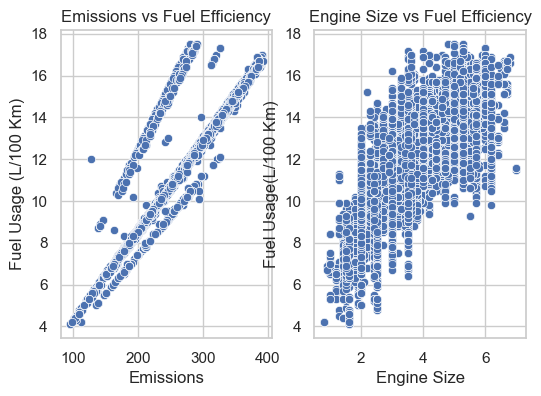

In [48]:
# Scatter plots to show the relationship between Fuel Consumption and Emissions and Engine Size

# Create subplots for each column against Fuel Efficiency
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
axes = axes.flatten()

# Scatter plot for Emissions vs Fuel Efficiency
sns.scatterplot(x='Emissions', y='Comb_L_per_100Km', data=df_clean, ax=axes[0])
axes[0].set_title('Emissions vs Fuel Efficiency')
axes[0].set_xlabel('Emissions')
axes[0].set_ylabel('Fuel Usage (L/100 Km)')


# Scatter plot for Engine Size vs Fuel Efficiency
sns.scatterplot(x='Engine Size', y='Comb_L_per_100Km', data=df_clean, ax=axes[1])
axes[1].set_title('Engine Size vs Fuel Efficiency')
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('Fuel Usage(L/100 Km)')




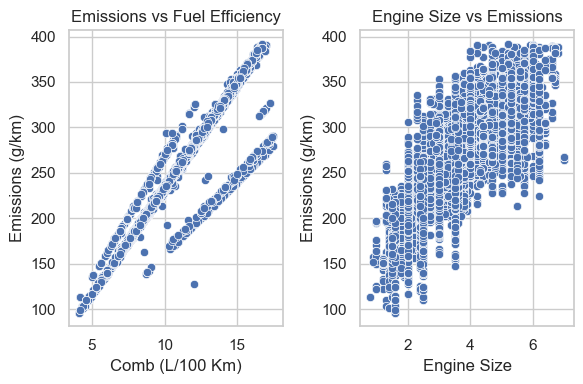

In [49]:
# Scatter plots to show the relationship between Emissions and Fuel Consumption and Engine Size

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
axes = axes.flatten()

# Scatter plot for Emissions vs Fuel Efficiency
sns.scatterplot(x='Comb_L_per_100Km', y='Emissions', data=df_clean, ax=axes[0])
axes[0].set_title('Emissions vs Fuel Efficiency')
axes[0].set_xlabel('Comb (L/100 Km)')
axes[0].set_ylabel('Emissions (g/km)')


# Scatter plot for Engine Size vs Fuel Efficiency
sns.scatterplot(x='Engine Size', y='Emissions', data=df_clean, ax=axes[1])
axes[1].set_title('Engine Size vs Emissions')
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('Emissions (g/km)')



# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()





Engine ngine size has an impact on both fuel consumption and CO2 emissions. Fuel consumption and CO2 emissions are also highly correlated. We will check the correlation of the other variables using a heat map

#### 4.2.2 Correlation Analysis of the numerical columns

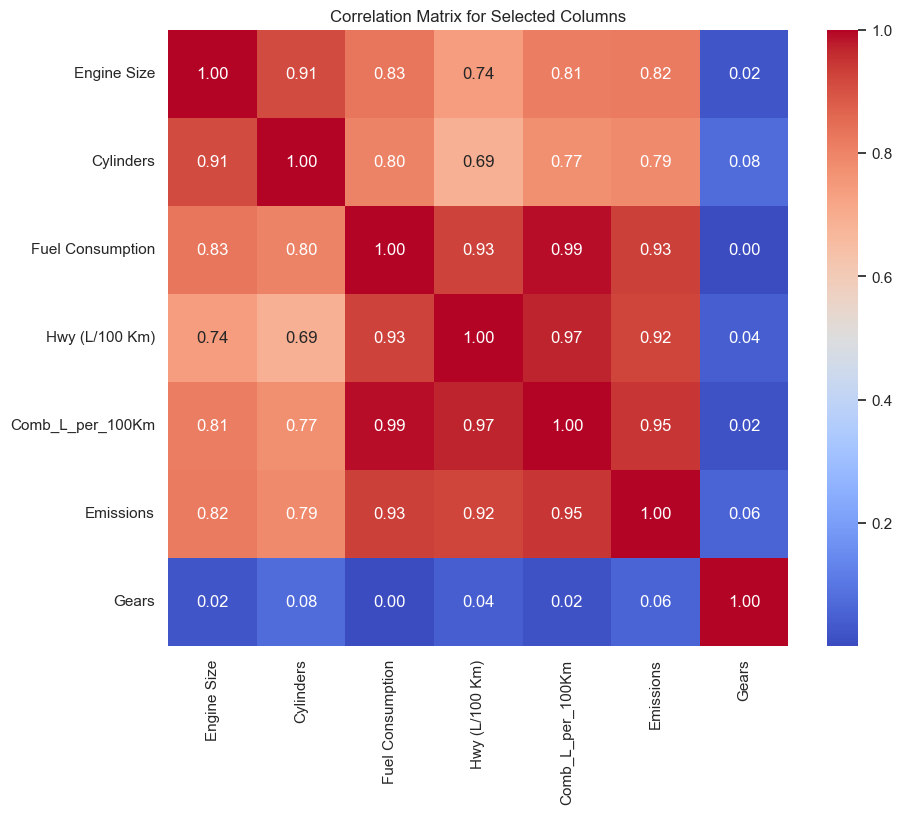

In [50]:
corr_matrix = df_clean[['Engine Size', 'Cylinders',
       'Fuel Consumption','Hwy (L/100 Km)', 'Comb_L_per_100Km',
       'Emissions','Gears']].corr()

# Create a heatmap to visualize the correlation matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Columns') 
plt.show()

We also see the number of cylinders also have an impact on fuel consumption and emissions. The number of gears have no influence on these factors.

#### 4.2.3 Regression Model: Effect of Engine Size on Fuel Consumption

In [80]:


import statsmodels.api as sm

x= df_clean['Engine Size']
y=df_clean['Comb_L_per_100Km']

# Add a constant to the independent variable 
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y,x).fit()

# Print the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Comb_L_per_100Km   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 4.089e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:29:20   Log-Likelihood:                -36732.
No. Observations:               20864   AIC:                         7.347e+04
Df Residuals:                   20862   BIC:                         7.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.7094      0.027    209.646      0.000       5.656       5.763
Engine Size     1.5566      0.008    202.206      0.000       1.542       1.572
==============================================================================
Omnibus:                      732.404   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1136.016
Skew:                           0.334   Prob(JB):                    2.08e-247
Kurtosis:                       3.928   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Key Metrics**:

1. **R-Squared:** 0.662  
This means that approximately 66.2% of the variablility in fuel consumption can b explained by the engine size. This is a   moderately strong relationship.  
2. **F-Statistic:** 4.089e+04 with a p-value of 0.00
The F-statistic is very high, and the corresponding p-value is < 0.0, indicating that the model is statistically significant.  
3. **Coefficients: Intercept(const):** 5.7095  
This is the expected value of 'Comb (L/100 Km)' when 'Engine Size' is zero  
4. **Coefficients: Engine Size:** 1.5566   
For each one-unit increase in Engine Size, the Comb (L/100 Km) increases by approximately 1.5566 units, holding all else constant.  
5.**P>|t|:** Both the intercept and the engine size coefficients have p-values of 0.000, indicating they are statistically significant (typically, a p-value < 0.05 is considered significant).  

**Summary:**
The model shows a strong positive relationship between engine size and fuel consumption. The results indicate that as engine size increases, fuel consumption also increases, which aligns with typical expectations. The model explains a significant portion of the variability in fuel consumption, and the statistical tests suggest the model is reliable.


#### 4.2.4 Regression Model: Effect of No. of cylinders on Fuel Consumption

In [52]:

    
import statsmodels.api as sm

x= df_clean['Cylinders']
y=df_clean['Comb_L_per_100Km']

# Add a constant to the independent variable 
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y,x).fit()

# Print the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Comb_L_per_100Km   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 3.130e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:52:34   Log-Likelihood:                -38492.
No. Observations:               20864   AIC:                         7.699e+04
Df Residuals:                   20862   BIC:                         7.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5582      0.037    122.802      0.000       4.485       4.631
Cylinders      1.0863      0.006    176.919      0.000       1.074       1.098
==============================================================================
Omnibus:                      704.656   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.956
Skew:                           0.422   Prob(JB):                    5.39e-179
Kurtosis:                       3.482   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Key Metrics**:

1. **R-Squared:** 0.60  
This means that approximately 60% of the variablility in fuel consumption can b explained by the number of cylinders a vehicle has. This is a   moderately strong relationship.  
2. **F-Statistic:** 3.130e+04 with a p-value of 0.00
The F-statistic is  high, and the corresponding p-value is < 0.05, indicating that the model is statistically significant.  
3. **Coefficients: Intercept(const):** 4.5582  
This is the expected value of 'Comb (L/100 Km)' when 'Cylinders' is zero  
4. **Coefficients: Engine Size:** 1.5566   
For each one-unit increase in cylinders, the Comb (L/100 Km) increases by approximately 1.0863 units, holding all else constant.  
5.**P>|t|:** Both the intercept and the engine size coefficients have p-values of 0.000, indicating they are statistically significant (typically, a p-value < 0.05 is considered significant).  

**Summary:**
The model shows a strong positive relationship between enumber of cylinders and fuel consumption. The results indicate that as number of cylinders increases, fuel consumption also increases, which also aligns with typical expectations. The model explains a significant portion of the variability in fuel consumption, and the statistical tests suggest the model is reliable.


#### 4.2.5  Regression Model: Effect of fuel consumption  on Emissions

In [53]:

import statsmodels.api as sm

x= df_clean['Comb_L_per_100Km']
y=df_clean['Emissions']

# Add a constant to the independent variable 
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y,x).fit()

# Print the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.771e+05
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:52:34   Log-Likelihood:                -89135.
No. Observations:               20864   AIC:                         1.783e+05
Df Residuals:                   20862   BIC:                         1.783e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.0617      0.551     40.006      0.000      20.981      23.143
Comb_L_per_100Km    20.8718      0.050    420.813      0.000      20.775      20.969
==============================================================================
Omnibus:                    18117.370   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           466743.465
Skew:                          -4.267   Prob(JB):                         0.00
Kurtosis:                      24.542   Cond. No.                         51.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Key Metrics**:

1. **R-Squared:** 0.895  
This means that approximately 89.5% of the variablility in emissions can be explained by the vehicle consumption(Litres/100 km) This is a very strong relationship.  
2. **F-Statistic:** 1.771e+05 with a p-value of 0.00
The F-statistic is very high, and the corresponding p-value is < 0.05, indicating that the model is statistically significant.  
3. **Coefficients: Intercept(const):** 22.0617  
This is the expected value of emissions when the combined fuel consumption is zero
4. **Coefficients: Engine Size:** 20.8718   
For each one-unit increase in combined fuel consumption, emissions increase by approximately 20.8718 units, holding all else constant.
5.**P>|t|:** Both the intercept and the engine size coefficients have p-values of 0.000, indicating they are statistically significant (typically, a p-value < 0.05 is considered significant).  

**Summary:**
our model shows a very strong positive relationship between combined fuel consumption and emissions. This suggests that as fuel consumption increases, emissions also significantly increase. The high R-squared value and significant F-statistic affirm the model's reliability in explaining the variability in emissions.These results provide important insights into the environmental impact of fuel consumption.


#### 4.2.5 Anova Tests: The effect of the type of fuel on emissions

In [54]:
import scipy.stats as stats

# Extract fuel consumption values for each fuel type
fuel_X = df_clean[df_clean['Fuel'] == 'Regular']['Emissions']
fuel_Z = df_clean[df_clean['Fuel'] == 'Premium']['Emissions']
fuel_E = df_clean[df_clean['Fuel'] == 'Ethanol']['Emissions']
fuel_N = df_clean[df_clean['Fuel'] == 'Natural Gas']['Emissions']
fuel_D = df_clean[df_clean['Fuel'] == 'Diesel']['Emissions']


# Perform ANOVA test
anova_result = stats.f_oneway(fuel_X, fuel_Z, fuel_E, fuel_N, fuel_D)
    
print("ANOVA result for Fuel Consumption by Fuel Type:")
print(anova_result)


ANOVA result for Fuel Consumption by Fuel Type:
F_onewayResult(statistic=85.64002075697296, pvalue=2.801731643255809e-72)


**Interpretation of ANOVA Results:**  
1. **F-statistic: 85.64** 
This high value indicates that the variability between group means (emissions for different fuel types) is much greater than the variability within the groups.  
2. **p-value: 2.801731643255809e-72**  
The p-value is extremely low (much less than 0.05), which means we can reject the null hypothesis. There is a statistically   significant difference in emissions between at least two of the fuel types.

ANOVA result for Emissions by Fuel Type:
                sum_sq       df          F        PR(>F)
C(Fuel)   9.621719e+05      4.0  85.640021  2.801732e-72
Residual  5.858810e+07  20859.0        NaN           NaN
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
     Diesel     Ethanol   6.4568 0.4044  -3.6192  16.5328  False
     Diesel Natural Gas    62.98    0.0  30.3924  95.5676   True
     Diesel     Premium  25.5296    0.0  17.2286  33.8306   True
     Diesel     Regular  13.4006 0.0001   5.1258  21.6754   True
    Ethanol Natural Gas  56.5232    0.0  24.4243   88.622   True
    Ethanol     Premium  19.0728    0.0  12.9661  25.1795   True
    Ethanol     Regular   6.9438 0.0156   0.8727  13.0148   True
Natural Gas     Premium -37.4504 0.0107  -69.037  -5.8637   True
Natural Gas     Regular -49.5794 0.0002 -81.1592 -17.9996   True
    Prem

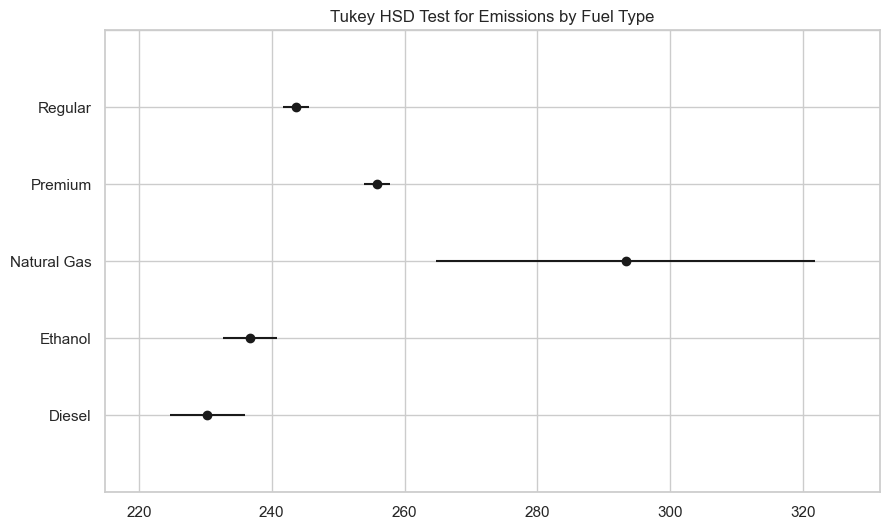

In [55]:
# Perform paired tests

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA test
anova_result = sm.stats.anova_lm(sm.OLS.from_formula('Emissions ~ C(Fuel)', data=df_clean).fit(), typ=2)
print("ANOVA result for Emissions by Fuel Type:")
print(anova_result)

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df_clean['Emissions'],
                                 groups=df_clean['Fuel'],
                                 alpha=0.05)
print(tukey_result)

# Plotting the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for Emissions by Fuel Type')
plt.show()



**Summary**  
The **reject** column being **True** most all columns indicate that most fuel types have significant differences in their mean emissions, except for the pair Diesel vs Ethanol, which shows no significant difference. These findings are crucial for understanding how different fuel types impact emissions and can inform decisions for reducing environmental impact.

**Plot Interpretation**
The plot shows which fuel types have higher or lower mean emissions. It is clear that Diesel has the lowest while natural gas has the highest.    
The horizontal lines provide the range within which the true mean emissions are expected to fall. If the confidence intervals of two fuel types do not overlap, it suggests a statistically significant difference between them.  


#### 4.2.6 Anova Tests: The effect of the type of transmission on fuel consumption


In [56]:
df_clean['Transmission'].value_counts()

Transmission
Auto             8091
Auto Shift       6592
Manual           4768
Auto Manual      1030
Auto Variable     383
Name: count, dtype: int64

In [57]:
import scipy.stats as stats

# Extract fuel consumption values for each fuel type
A= df_clean[df_clean['Transmission'] == 'Auto']['Comb_L_per_100Km']
AS = df_clean[df_clean['Transmission'] == 'Auto Shift']['Comb_L_per_100Km']
M = df_clean[df_clean['Transmission'] == 'Manual']['Comb_L_per_100Km']
AM = df_clean[df_clean['Transmission'] == 'Auto Manual']['Comb_L_per_100Km']
AV = df_clean[df_clean['Transmission'] == 'Auto Variable']['Comb_L_per_100Km']


# Perform ANOVA test
anova_result = stats.f_oneway(A, AS, M, AM, AV)
    
print("ANOVA result for Fuel Consumption by Transmission Type:")
print(anova_result)

ANOVA result for Fuel Consumption by Transmission Type:
F_onewayResult(statistic=643.9063656185466, pvalue=0.0)


**Interpretation of ANOVA Results:**

**F-statistic:**  
643.91 This high value indicates a substantial difference in fuel consumption across the different transmission types.  
**p-value: 0.0**    
The p-value is less than 0.05, which means we reject the null hypothesis and conclude that there is a statistically significant difference in fuel consumption between at least two of the transmission types.

ANOVA result for Fuel Consumption by Transmission Type:
                        sum_sq       df           F  PR(>F)
C(Transmission)   13440.737193      4.0  643.906366     0.0
Residual         108851.361035  20859.0         NaN     NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         Auto   Auto Manual  -1.1936    0.0 -1.3998 -0.9875   True
         Auto    Auto Shift  -0.8933    0.0 -0.9967 -0.7899   True
         Auto Auto Variable  -3.4524    0.0 -3.7782 -3.1265   True
         Auto        Manual  -1.8612    0.0  -1.975 -1.7474   True
  Auto Manual    Auto Shift   0.3003 0.0008  0.0915  0.5091   True
  Auto Manual Auto Variable  -2.2587    0.0 -2.6317 -1.8858   True
  Auto Manual        Manual  -0.6676    0.0 -0.8817 -0.4534   True
   Auto Shift Auto Variable   -2.559    0.0 -2.8866 -2.2315   True
   Auto Shift        Manual

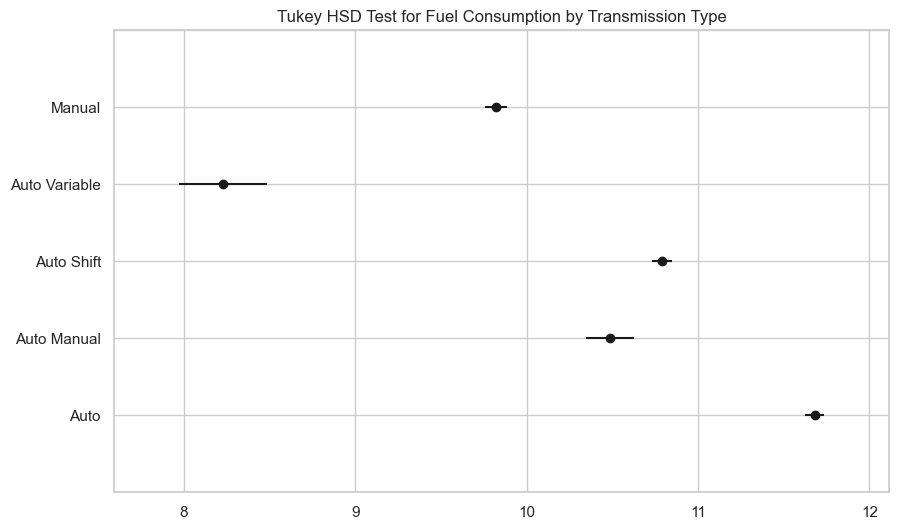

In [58]:
# Perform Paired Tests

# Perform ANOVA test
anova_result = sm.stats.anova_lm(sm.OLS.from_formula('Comb_L_per_100Km ~ C(Transmission)', data=df_clean).fit(), typ=2)
print("ANOVA result for Fuel Consumption by Transmission Type:")
print(anova_result)

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df_clean['Comb_L_per_100Km'],
                                 groups=df_clean['Transmission'],
                                 alpha=0.05)
print(tukey_result)

# Plotting the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for Fuel Consumption by Transmission Type')
plt.show()


The **reject** column being **True** for all comparisons indicates that there are statistically significant differences in fuel consumption between each pair of transmission types.